In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Stellar Classification Dataset - SDSS17
# dataset url: https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17?resource=download
dataset_relative_path = "star_classification.csv"
df = pd.read_csv(dataset_relative_path)

1. obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
2. alpha = Right Ascension angle (at J2000 epoch)
3. delta = Declination angle (at J2000 epoch)
4. u = Ultraviolet filter in the photometric system
5. g = Green filter in the photometric system
6. r = Red filter in the photometric system
7. i = Near Infrared filter in the photometric system
8. z = Infrared filter in the photometric system
9. run_ID = Run Number used to identify the specific scan
10. rereun_ID = Rerun Number to specify how the image was processed
11. cam_col = Camera column to identify the scanline within the run
12. field_ID = Field number to identify each field
13. spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
14. class = object class (galaxy, star or quasar object)
15. redshift = redshift value based on the increase in wavelength
16. plate = plate ID, identifies each plate in SDSS
17. MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
18. fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

In [3]:
# Значення -9999.000000 в u, g, z явно вказує на наявність значення NO DATA, оскільки ці показники не можуть приймати таке значення
df = df.drop(df[df["u"] == -9999.0].index)
df = df.drop(df[df["g"] == -9999.0].index)
df = df.drop(df[df["z"] == -9999.0].index)
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000
mean,1.237665e+18,177.628653,24.135552,22.080679,20.631583,19.645777,19.084865,18.768988,4481.403354,301.0,3.511625,186.127011,5.783903e+18,0.576667,5137.027890,55588.653687,449.315613
std,8.438450e+12,96.502612,19.644608,2.251068,2.037384,1.854763,1.757900,1.765982,1964.739021,0.0,1.586913,149.007687,3.324026e+18,0.730709,2952.312485,1808.492217,272.498252
min,1.237646e+18,0.005528,-18.785328,10.996230,10.498200,9.822070,9.469903,9.612333,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.517698,5.147477,20.352410,18.965240,18.135795,17.732280,17.460830,3187.000000,301.0,2.000000,82.000000,2.844137e+18,0.054522,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900527,23.646462,22.179140,21.099930,20.125310,19.405150,19.004600,4188.000000,301.0,4.000000,146.000000,5.614896e+18,0.424176,4987.000000,55869.000000,433.000000
75%,1.237668e+18,233.895005,39.901582,23.687480,22.123775,21.044790,20.396510,19.921120,5326.000000,301.0,5.000000,241.000000,8.332365e+18,0.704172,7400.500000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [4]:
# obj_ID, alpha, delta, run_ID, rerun_ID, spec_obj_ID, field_ID - не можуть впливати на класифікацію
df = df.drop(columns=["obj_ID", "alpha", "delta", "run_ID", "rerun_ID", "spec_obj_ID", "field_ID"], errors='ignore')
df.head()

,u,g,r,i,z,cam_col,class,redshift,plate,MJD,fiber_ID
0,23.87882,22.27530,20.39501,19.16573,18.79371,2,GALAXY,0.634794,5812,56354,171
1,24.77759,22.83188,22.58444,21.16812,21.61427,5,GALAXY,0.779136,10445,58158,427
2,25.26307,22.66389,20.60976,19.34857,18.94827,2,GALAXY,0.644195,4576,55592,299
3,22.13682,23.77656,21.61162,20.50454,19.25010,3,GALAXY,0.932346,9149,58039,775
4,19.43718,17.58028,16.49747,15.97711,15.54461,3,GALAXY,0.116123,6121,56187,842


In [5]:
remap_dict = {"GALAXY": 0, "QSO": 1, "STAR": 2}
df["class"].update(df["class"].map(remap_dict))
df = df.astype({"class": "int64"})
df.head()

,u,g,r,i,z,cam_col,class,redshift,plate,MJD,fiber_ID
0,23.87882,22.27530,20.39501,19.16573,18.79371,2,0,0.634794,5812,56354,171
1,24.77759,22.83188,22.58444,21.16812,21.61427,5,0,0.779136,10445,58158,427
2,25.26307,22.66389,20.60976,19.34857,18.94827,2,0,0.644195,4576,55592,299
3,22.13682,23.77656,21.61162,20.50454,19.25010,3,0,0.932346,9149,58039,775
4,19.43718,17.58028,16.49747,15.97711,15.54461,3,0,0.116123,6121,56187,842


<Axes: >

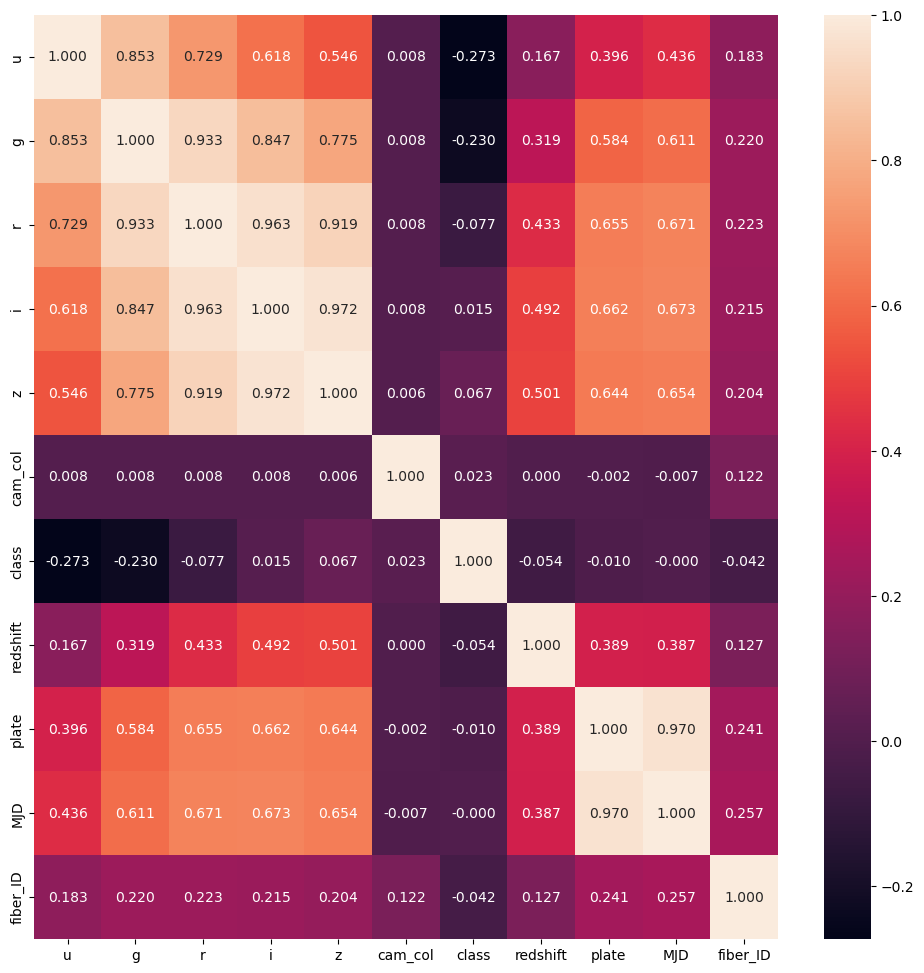

In [6]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, fmt=".3f")

In [7]:
from sklearn.preprocessing import StandardScaler

y = df["class"]
X = df.drop(["class"], axis=1)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [14]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_std)

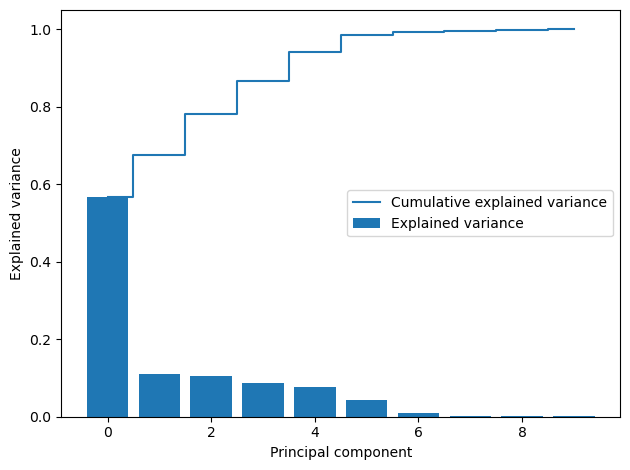

In [15]:
exp_var = pca.explained_variance_ratio_
cum_sum = np.cumsum(exp_var)

plt.bar(range(0, len(exp_var)), exp_var, label="Explained variance")
plt.step(range(0,len(cum_sum)), cum_sum, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

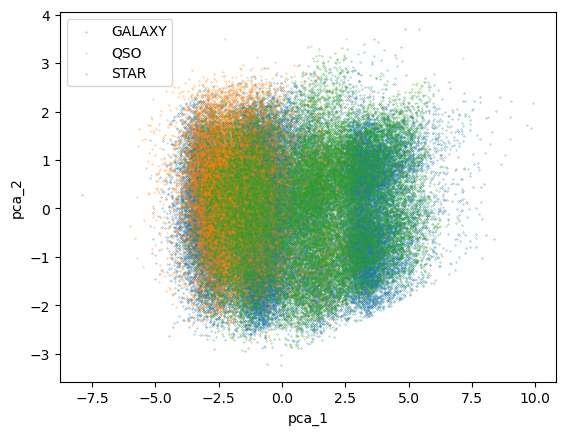

In [30]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

pca_result_df = pd.DataFrame({'pca_1': X_pca[:,0], 'pca_2': X_pca[:,1], 'label': y})

remap_dict = {0: "GALAXY", 1: "QSO", 2: "STAR"}
for i in range(3):
    sub_df = pca_result_df.loc[pca_result_df.label == i]
    plt.scatter(sub_df.pca_1, sub_df.pca_2, s=0.05, label=remap_dict[i])

plt.xlabel("pca_1")
plt.ylabel("pca_2")
plt.legend()
plt.show()

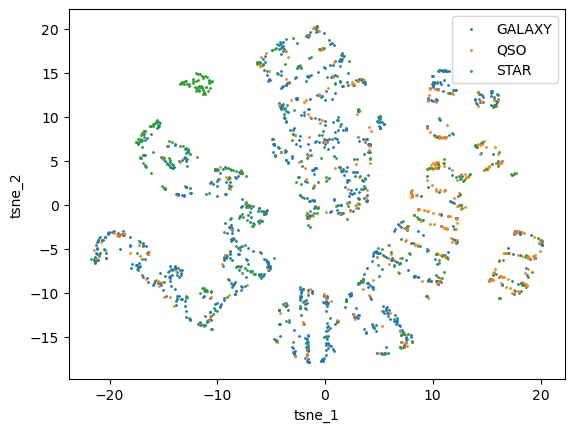

In [39]:
from sklearn.manifold import TSNE

sdf = df.sample(2000)

y = sdf["class"]
X = sdf.drop(["class"], axis=1)

tsne = TSNE(n_components=2, n_iter=350, perplexity=30)
X_tsne = tsne.fit_transform(X)

tsne_result_df = pd.DataFrame({'tsne_1': X_tsne[:,0], 'tsne_2': X_tsne[:,1], 'label': y})

remap_dict = {0: "GALAXY", 1: "QSO", 2: "STAR"}
for i in range(3):
    sub_df = tsne_result_df.loc[tsne_result_df.label == i]
    plt.scatter(sub_df.tsne_1, sub_df.tsne_2, s=1, label=remap_dict[i])

plt.xlabel("tsne_1")
plt.ylabel("tsne_2")
plt.legend()
plt.show()

# KMEANS

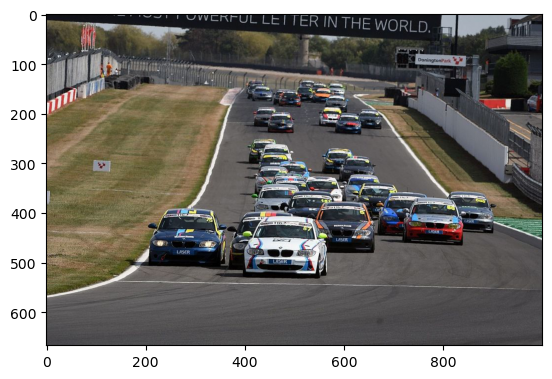

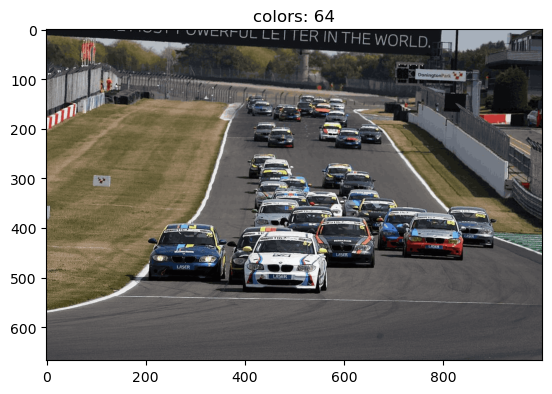

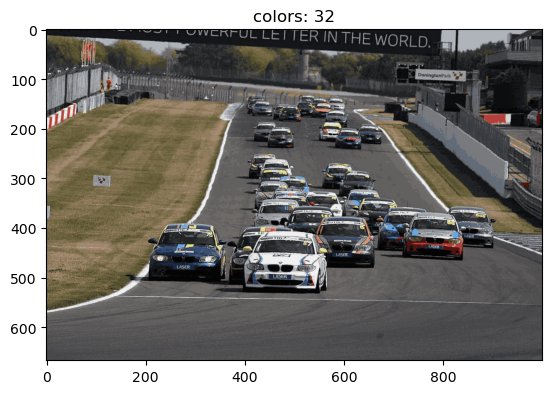

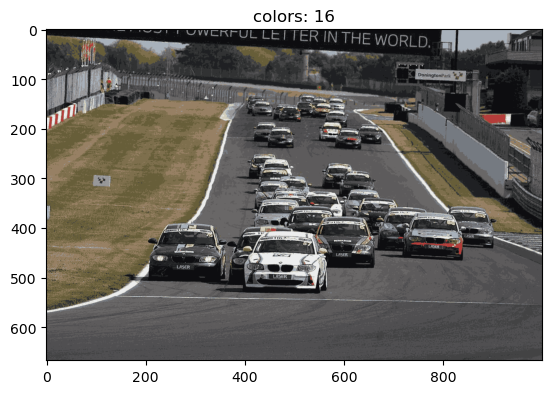

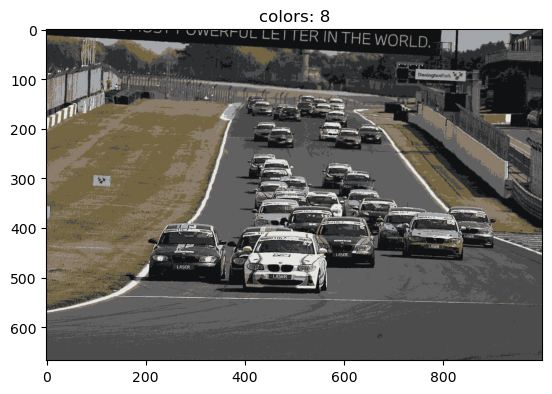

In [43]:
from sklearn.cluster import KMeans

img = plt.imread("auto-116-start-woodward-leads-.jpg")
img = np.array(img, dtype=np.float64) / 255

plt.figure()
plt.imshow(img)

s = img.shape
img_i = np.reshape(img, (s[0] * s[1], s[2]))

colors_list = [64, 32, 16, 8]
for n_colors in colors_list:
    kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(img_i)
    predict = kmeans.predict(img_i)
    img_pred = np.reshape(kmeans.cluster_centers_[predict], (s[0], s[1], s[2]))
    plt.figure()
    plt.title(f"colors: {n_colors}")
    plt.imshow(img_pred)

# TEXT

In [165]:
# Trip Advisor Hotel Reviews
# dataset url: https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews

reviews = pd.read_csv("tripadvisor_hotel_reviews.csv")
reviews.head() 

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [166]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

import re
import string

In [167]:
lemmatizer = WordNetLemmatizer()

print(reviews.shape)
reviews = reviews.reset_index()
filtered_reviews = [None]*reviews.shape[0]

for i, row in reviews.iterrows():
    text = row.Review
    text = text.lower()
    text = re.sub("@\S+", " ", text)
    text = re.sub("https*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\d", " ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    tokens = word_tokenize(text)
    stop_words = stopwords.words('english')

    counter = 0
    filtered = [None]*len(tokens)
    for word in tokens:
        if word not in stop_words:
            filtered[counter] = word
            counter += 1

    filtered = filtered[:counter]
    lemmatized = [lemmatizer.lemmatize(t) for t in filtered]
    filtered_reviews[i] = ' '.join(lemmatized)

reviews.Reviews = filtered_reviews


(20491, 2)


C:\Users\yevhe\AppData\Local\Temp\ipykernel_9048\3006321656.py:31: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  reviews.Reviews = filtered_reviews


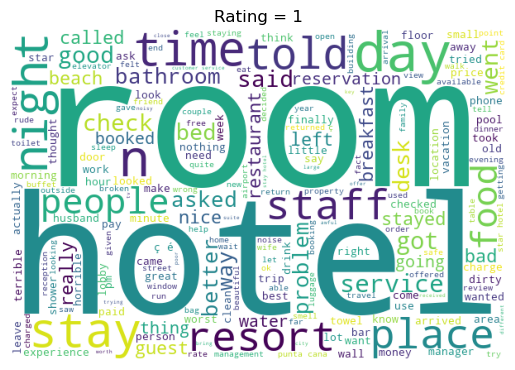

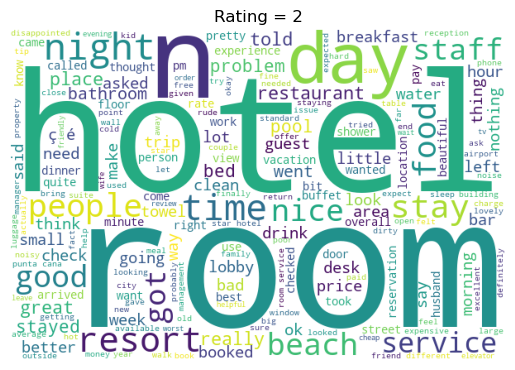

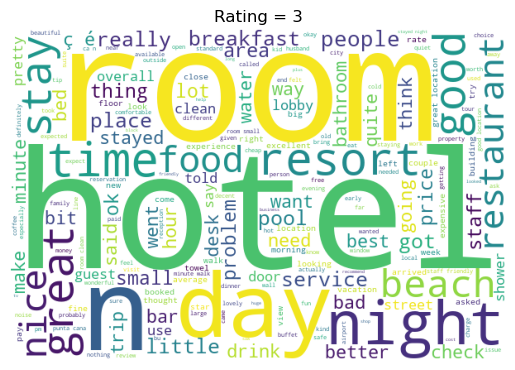

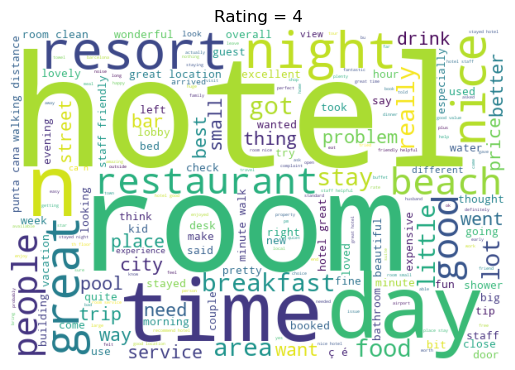

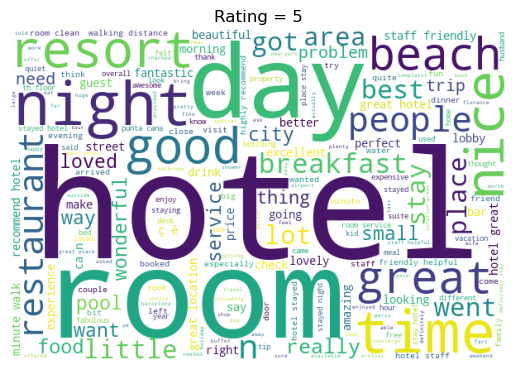

In [168]:
from wordcloud import WordCloud

for label in range(5):
    indices = reviews.index[reviews.Rating == label + 1]
    full_text = ""
    for i in indices:
        full_text += filtered_reviews[i]
        full_text += ' '

    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(full_text)
    plt.figure()
    plt.title(f"Rating = {label + 1}")
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [171]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(reviews.Review, reviews.Rating, train_size=0.5)

tfidf_vectorizer = TfidfVectorizer(max_df=1500, min_df=10)

tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test =  tfidf_vectorizer.transform(X_test)

clf = MLPClassifier((75, 33, 12), activation='relu', solver='adam').fit(tfidf_train, y_train)

predicted = clf.predict(tfidf_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           1       0.61      0.52      0.56       732
           2       0.37      0.35      0.36       901
           3       0.26      0.28      0.27      1093
           4       0.44      0.44      0.44      3038
           5       0.68      0.69      0.69      4482

    accuracy                           0.53     10246
   macro avg       0.47      0.46      0.46     10246
weighted avg       0.53      0.53      0.53     10246

